In [ ]:
import itertools

hyperparameters = {
    'alpha': [1.0, 50.0, 100.0],
    'beta': [1.0, 50.0, 100.0],
}

combinations = list(itertools.product(*(hyperparameters[hp] for hp in hyperparameters)))

for values in combinations:
    command = f'python train.py --data cora_balanced --seed 42'
    for hp, value in zip(hyperparameters.keys(), values):
        command += f' --{hp} {value}'
    print(f'Running: {command}')
    !{command}

In [34]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics

In [35]:
s = """
Running: python train.py --data cora_balanced --seed 42 --alpha 1.0 --beta 1.0
balance: 0.8103448275862069
entropy: 2.0609289016760606
nmi: 0.8356982711604124
acc: 0.778
Running: python train.py --data cora_balanced --seed 42 --alpha 1.0 --beta 50.0
balance: 0.8103448275862069
entropy: 2.0601712688238427
nmi: 0.9480868484846972
acc: 0.922
Running: python train.py --data cora_balanced --seed 42 --alpha 1.0 --beta 100.0
balance: 0.8103448275862069
entropy: 2.063480435493104
nmi: 0.8334134687916561
acc: 0.776
Running: python train.py --data cora_balanced --seed 42 --alpha 50.0 --beta 1.0
balance: 0.8103448275862069
entropy: 2.059728683024966
nmi: 0.9565870988520966
acc: 0.927
Running: python train.py --data cora_balanced --seed 42 --alpha 50.0 --beta 50.0
balance: 0.8518518518518519
entropy: 2.0664112718556895
nmi: 0.7446011861842456
acc: 0.669
Running: python train.py --data cora_balanced --seed 42 --alpha 50.0 --beta 100.0
balance: 0.66
entropy: 2.045771914941187
nmi: 0.7006228545691608
acc: 0.67
Running: python train.py --data cora_balanced --seed 42 --alpha 100.0 --beta 1.0
balance: 0.8275862068965517
entropy: 2.0615231881810714
nmi: 0.9315527549141447
acc: 0.92
Running: python train.py --data cora_balanced --seed 42 --alpha 100.0 --beta 50.0
balance: 0.8440366972477065
entropy: 2.065547403053893
nmi: 0.7460545309023613
acc: 0.67
Running: python train.py --data cora_balanced --seed 42 --alpha 100.0 --beta 100.0
balance: 0.8411214953271028
entropy: 2.0647495909143716
nmi: 0.7404216518726017
acc: 0.669
Running: python train.py --data cora_balanced --seed 41 --alpha 1.0 --beta 1.0
balance: 0.8103448275862069
entropy: 2.0578403251990984
nmi: 0.9554032983172892
acc: 0.926
Running: python train.py --data cora_balanced --seed 41 --alpha 1.0 --beta 50.0
balance: 0.8205128205128205
entropy: 2.0623255066156965
nmi: 0.8340051343708916
acc: 0.777
Running: python train.py --data cora_balanced --seed 41 --alpha 1.0 --beta 100.0
balance: 0.8205128205128205
entropy: 2.0635616749447303
nmi: 0.8306814020806359
acc: 0.776
Running: python train.py --data cora_balanced --seed 41 --alpha 50.0 --beta 1.0
balance: 0.7889908256880734
entropy: 2.4032335019065796
nmi: 0.8739715847706092
acc: 0.886
Running: python train.py --data cora_balanced --seed 41 --alpha 50.0 --beta 50.0
balance: 0.8103448275862069
entropy: 2.0619049251366883
nmi: 0.8297698394875754
acc: 0.774
Running: python train.py --data cora_balanced --seed 41 --alpha 50.0 --beta 100.0
balance: 0.8103448275862069
entropy: 2.0633283338145736
nmi: 0.8407709078161237
acc: 0.778
Running: python train.py --data cora_balanced --seed 41 --alpha 100.0 --beta 1.0
balance: 0
entropy: 2.064697175335372
nmi: 0.9225235673322192
acc: 0.92
Running: python train.py --data cora_balanced --seed 41 --alpha 100.0 --beta 50.0
balance: 0.8103448275862069
entropy: 2.058009739884901
nmi: 0.9580572386520309
acc: 0.927
Running: python train.py --data cora_balanced --seed 41 --alpha 100.0 --beta 100.0
balance: 0
entropy: 2.0589480855597553
nmi: 0.9565421415184706
acc: 0.926
Running: python train.py --data cora_balanced --seed 40 --alpha 1.0 --beta 1.0
balance: 0.8103448275862069
entropy: 2.0588808925286983
nmi: 0.9605092698597684
acc: 0.928
Running: python train.py --data cora_balanced --seed 40 --alpha 1.0 --beta 50.0
balance: 0.8288288288288288
entropy: 2.061723520679207
nmi: 0.8626978763355111
acc: 0.821
Running: python train.py --data cora_balanced --seed 40 --alpha 1.0 --beta 100.0
balance: 0
entropy: 2.0515355643914903
nmi: 0.8519879156093924
acc: 0.842
Running: python train.py --data cora_balanced --seed 40 --alpha 50.0 --beta 1.0
balance: 0.8103448275862069
entropy: 2.059162286287946
nmi: 0.9571375556252251
acc: 0.927
Running: python train.py --data cora_balanced --seed 40 --alpha 50.0 --beta 50.0
balance: 0.8103448275862069
entropy: 2.05895395314598
nmi: 0.9612256358322312
acc: 0.928
Running: python train.py --data cora_balanced --seed 40 --alpha 50.0 --beta 100.0
balance: 0.8099173553719008
entropy: 2.0617735899120966
nmi: 0.9442601898152384
acc: 0.923
Running: python train.py --data cora_balanced --seed 40 --alpha 100.0 --beta 1.0
balance: 0
entropy: 2.356054554834062
nmi: 0.8928044052170692
acc: 0.943
Running: python train.py --data cora_balanced --seed 40 --alpha 100.0 --beta 50.0
balance: 0.8103448275862069
entropy: 2.0592205350354242
nmi: 0.964101637162654
acc: 0.929
Running: python train.py --data cora_balanced --seed 40 --alpha 100.0 --beta 100.0
balance: 0.043478260869565216
entropy: 1.8408223514268638
nmi: 0.8926137847718062
acc: 0.823
Running: python train.py --data cora_balanced --seed 39 --alpha 1.0 --beta 1.0
balance: 0.8518518518518519
entropy: 2.06084675692024
nmi: 0.7477484020505357
acc: 0.666
Running: python train.py --data cora_balanced --seed 39 --alpha 1.0 --beta 50.0
balance: 0.4897959183673469
entropy: 1.9800978806046199
nmi: 0.8720512800124594
acc: 0.831
Running: python train.py --data cora_balanced --seed 39 --alpha 1.0 --beta 100.0
balance: 0
entropy: 2.064494318445875
nmi: 0.7403985152886962
acc: 0.666
Running: python train.py --data cora_balanced --seed 39 --alpha 50.0 --beta 1.0
balance: 0.8103448275862069
entropy: 2.0601053607270385
nmi: 0.8569446582397576
acc: 0.819
Running: python train.py --data cora_balanced --seed 39 --alpha 50.0 --beta 50.0
balance: 0.8402366863905325
entropy: 2.058344245276431
nmi: 0.8591366373209598
acc: 0.817
Running: python train.py --data cora_balanced --seed 39 --alpha 50.0 --beta 100.0
balance: 0.8392857142857143
entropy: 2.0613184980803974
nmi: 0.7438357536873014
acc: 0.667
Running: python train.py --data cora_balanced --seed 39 --alpha 100.0 --beta 1.0
balance: 0.8623853211009175
entropy: 2.406841014238527
nmi: 0.8608777700167408
acc: 0.85
Running: python train.py --data cora_balanced --seed 39 --alpha 100.0 --beta 50.0
balance: 0.6451612903225806
entropy: 2.030412772473796
nmi: 0.7566493351050111
acc: 0.671
Running: python train.py --data cora_balanced --seed 39 --alpha 100.0 --beta 100.0
balance: 0.8452380952380952
entropy: 2.058893507530359
nmi: 0.8584531965217849
acc: 0.818
Running: python train.py --data cora_balanced --seed 38 --alpha 1.0 --beta 1.0
balance: 0.831858407079646
entropy: 2.060296150844286
nmi: 0.8636941886732115
acc: 0.82
Running: python train.py --data cora_balanced --seed 38 --alpha 1.0 --beta 50.0
balance: 0.831858407079646
entropy: 2.0646705536456036
nmi: 0.7435046432578506
acc: 0.673
Running: python train.py --data cora_balanced --seed 38 --alpha 1.0 --beta 100.0
balance: 0.831858407079646
entropy: 2.0620840667056743
nmi: 0.8678692320361893
acc: 0.822
Running: python train.py --data cora_balanced --seed 38 --alpha 50.0 --beta 1.0
balance: 0.8103448275862069
entropy: 2.0597099346485503
nmi: 0.9565453703003516
acc: 0.927
Running: python train.py --data cora_balanced --seed 38 --alpha 50.0 --beta 50.0
balance: 0.8141592920353983
entropy: 2.0588560855266653
nmi: 0.861916304961378
acc: 0.822
Running: python train.py --data cora_balanced --seed 38 --alpha 50.0 --beta 100.0
balance: 0.8392857142857143
entropy: 2.0641973708568857
nmi: 0.7439548418650587
acc: 0.671
Running: python train.py --data cora_balanced --seed 38 --alpha 100.0 --beta 1.0
balance: 0.8
entropy: 2.3954861897231963
nmi: 0.909548601504447
acc: 0.908
Running: python train.py --data cora_balanced --seed 38 --alpha 100.0 --beta 50.0
balance: 0.8173913043478261
entropy: 2.059612407316278
nmi: 0.8609134177261445
acc: 0.821
Running: python train.py --data cora_balanced --seed 38 --alpha 100.0 --beta 100.0
balance: 0.8245614035087719
entropy: 2.0594556144491913
nmi: 0.8617269170008987
acc: 0.821
Running: python train.py --data cora_balanced --seed 37 --alpha 1.0 --beta 1.0
balance: 0.8421052631578947
entropy: 2.0616907792011996
nmi: 0.8666653282945367
acc: 0.821
Running: python train.py --data cora_balanced --seed 37 --alpha 1.0 --beta 50.0
balance: 0.8392857142857143
entropy: 2.061592707549707
nmi: 0.7423315337687267
acc: 0.669
Running: python train.py --data cora_balanced --seed 37 --alpha 1.0 --beta 100.0
balance: 0.8598130841121495
entropy: 2.062049813591446
nmi: 0.7421741816965411
acc: 0.666
Running: python train.py --data cora_balanced --seed 37 --alpha 50.0 --beta 1.0
balance: 0.8103448275862069
entropy: 2.403287080511438
nmi: 0.9772549146133237
acc: 0.988
Running: python train.py --data cora_balanced --seed 37 --alpha 50.0 --beta 50.0
balance: 0.8103448275862069
entropy: 2.060609267538748
nmi: 0.9645531381501857
acc: 0.929
Running: python train.py --data cora_balanced --seed 37 --alpha 50.0 --beta 100.0
balance: 0.8214285714285714
entropy: 2.06195140941544
nmi: 0.7409870091205445
acc: 0.672
Running: python train.py --data cora_balanced --seed 37 --alpha 100.0 --beta 1.0
balance: 0.7555555555555555
entropy: 2.397100191924406
nmi: 0.8381586385828445
acc: 0.862
Running: python train.py --data cora_balanced --seed 37 --alpha 100.0 --beta 50.0
balance: 0.8103448275862069
entropy: 2.060638752158173
nmi: 0.9635508012052484
acc: 0.929
Running: python train.py --data cora_balanced --seed 37 --alpha 100.0 --beta 100.0
balance: 0.8103448275862069
entropy: 2.060629695619294
nmi: 0.9698749554346895
acc: 0.931
Running: python train.py --data cora_balanced --seed 36 --alpha 1.0 --beta 1.0
balance: 0
entropy: 1.987161182007024
nmi: 0.8893654699339828
acc: 0.882
Running: python train.py --data cora_balanced --seed 36 --alpha 1.0 --beta 50.0
balance: 0.8888888888888888
entropy: 2.0654077006125107
nmi: 0.8496733965263418
acc: 0.814
Running: python train.py --data cora_balanced --seed 36 --alpha 1.0 --beta 100.0
balance: 0.6815642458100558
entropy: 2.034702904334562
nmi: 0.8571759102615572
acc: 0.841
Running: python train.py --data cora_balanced --seed 36 --alpha 50.0 --beta 1.0
balance: 0.8103448275862069
entropy: 2.059188445732027
nmi: 0.9374011697470925
acc: 0.923
Running: python train.py --data cora_balanced --seed 36 --alpha 50.0 --beta 50.0
balance: 0.8034188034188035
entropy: 2.0588487989596906
nmi: 0.9612029462519176
acc: 0.928
Running: python train.py --data cora_balanced --seed 36 --alpha 50.0 --beta 100.0
balance: 0.8103448275862069
entropy: 2.059673397481029
nmi: 0.9582865551675331
acc: 0.927
Running: python train.py --data cora_balanced --seed 36 --alpha 100.0 --beta 1.0
balance: 0.45
entropy: 2.30526559042769
nmi: 0.892148711013559
acc: 0.886
Running: python train.py --data cora_balanced --seed 36 --alpha 100.0 --beta 50.0
balance: 0
entropy: 1.8403506576399693
nmi: 0.8547525568703759
acc: 0.778
Running: python train.py --data cora_balanced --seed 36 --alpha 100.0 --beta 100.0
balance: 0.8103448275862069
entropy: 2.060614757562052
nmi: 0.9644694621024704
acc: 0.929
Running: python train.py --data cora_balanced --seed 35 --alpha 1.0 --beta 1.0
balance: 0.8135593220338984
entropy: 2.060995451368491
nmi: 0.9619722273132114
acc: 0.931
Running: python train.py --data cora_balanced --seed 35 --alpha 1.0 --beta 50.0
balance: 0.8103448275862069
entropy: 2.0612216046788627
nmi: 0.9700861616320737
acc: 0.931
Running: python train.py --data cora_balanced --seed 35 --alpha 1.0 --beta 100.0
balance: 0.8103448275862069
entropy: 2.061429837070229
nmi: 0.9664692891250475
acc: 0.93
Running: python train.py --data cora_balanced --seed 35 --alpha 50.0 --beta 1.0
balance: 0.8205128205128205
entropy: 2.0633738029852804
nmi: 0.9510356990891167
acc: 0.93
Running: python train.py --data cora_balanced --seed 35 --alpha 50.0 --beta 50.0
balance: 0.8103448275862069
entropy: 2.0602228690648734
nmi: 0.9661037257273175
acc: 0.93
Running: python train.py --data cora_balanced --seed 35 --alpha 50.0 --beta 100.0
balance: 0.8103448275862069
entropy: 2.054419557183166
nmi: 0.8416701419217786
acc: 0.781
Running: python train.py --data cora_balanced --seed 35 --alpha 100.0 --beta 1.0
balance: 0.7682119205298014
entropy: 2.0569581509380948
nmi: 0.8134098850337474
acc: 0.818
Running: python train.py --data cora_balanced --seed 35 --alpha 100.0 --beta 50.0
balance: 0.8205128205128205
entropy: 2.0614311289412255
nmi: 0.9608833751831249
acc: 0.93
Running: python train.py --data cora_balanced --seed 35 --alpha 100.0 --beta 100.0
balance: 0.8103448275862069
entropy: 2.0602228690648734
nmi: 0.9661037257273175
acc: 0.93
Running: python train.py --data cora_balanced --seed 34 --alpha 1.0 --beta 1.0
balance: 0
entropy: 1.7224385336490382
nmi: 0.9002554035193926
acc: 0.824
Running: python train.py --data cora_balanced --seed 34 --alpha 1.0 --beta 50.0
balance: 0.8103448275862069
entropy: 2.060629695619294
nmi: 0.9698749554346895
acc: 0.931
Running: python train.py --data cora_balanced --seed 34 --alpha 1.0 --beta 100.0
balance: 0.8103448275862069
entropy: 2.060629695619294
nmi: 0.9698749554346895
acc: 0.931
Running: python train.py --data cora_balanced --seed 34 --alpha 50.0 --beta 1.0
balance: 0.8135593220338984
entropy: 2.0613086743521
nmi: 0.9575606661131075
acc: 0.928
Running: python train.py --data cora_balanced --seed 34 --alpha 50.0 --beta 50.0
balance: 0
entropy: 2.059970172511413
nmi: 0.9656902681480007
acc: 0.93
Running: python train.py --data cora_balanced --seed 34 --alpha 50.0 --beta 100.0
balance: 0.8103448275862069
entropy: 2.060629695619294
nmi: 0.9698749554346895
acc: 0.931
Running: python train.py --data cora_balanced --seed 34 --alpha 100.0 --beta 1.0
balance: 0.6666666666666666
entropy: 2.7148486489125947
nmi: 0.8778642298443717
acc: 0.906
Running: python train.py --data cora_balanced --seed 34 --alpha 100.0 --beta 50.0
balance: 0.8103448275862069
entropy: 2.060293991047063
nmi: 0.9610244097684394
acc: 0.93
Running: python train.py --data cora_balanced --seed 34 --alpha 100.0 --beta 100.0
balance: 0
entropy: 2.0605418171380867
nmi: 0.9688599993020227
acc: 0.931
Running: python train.py --data cora_balanced --seed 33 --alpha 1.0 --beta 1.0
balance: 0.831858407079646
entropy: 2.062122546541677
nmi: 0.8723265612609957
acc: 0.821
Running: python train.py --data cora_balanced --seed 33 --alpha 1.0 --beta 50.0
balance: 0.8288288288288288
entropy: 2.0616852072799903
nmi: 0.8647729864939462
acc: 0.821
Running: python train.py --data cora_balanced --seed 33 --alpha 1.0 --beta 100.0
balance: 0.8301886792452831
entropy: 2.06532388206766
nmi: 0.7342172527015318
acc: 0.669
Running: python train.py --data cora_balanced --seed 33 --alpha 50.0 --beta 1.0
balance: 0
entropy: 2.4043339048885235
nmi: 0.9345425323576001
acc: 0.934
Running: python train.py --data cora_balanced --seed 33 --alpha 50.0 --beta 50.0
balance: 0.8269230769230769
entropy: 2.0609728387699993
nmi: 0.8541839064207116
acc: 0.816
Running: python train.py --data cora_balanced --seed 33 --alpha 50.0 --beta 100.0
balance: 0.8141592920353983
entropy: 2.05972472746548
nmi: 0.9475581660187157
acc: 0.923
Running: python train.py --data cora_balanced --seed 33 --alpha 100.0 --beta 1.0
balance: 0.8125
entropy: 2.742774522877809
nmi: 0.8186755758146423
acc: 0.885
Running: python train.py --data cora_balanced --seed 33 --alpha 100.0 --beta 50.0
balance: 0.8079470198675497
entropy: 2.0544524326011944
nmi: 0.8318858078770234
acc: 0.803
Running: python train.py --data cora_balanced --seed 33 --alpha 100.0 --beta 100.0
balance: 0.8035714285714286
entropy: 2.058694317617441
nmi: 0.9439444190036694
acc: 0.922
"""

In [39]:
from collections import defaultdict

# The regex pattern
pattern = r"--seed (\d+) --alpha (\d+\.?\d*) --beta (\d+\.?\d*)\nbalance: (\d+\.?\d*)\nentropy: (\d+\.?\d*)\nnmi: (\d+\.?\d*)\nacc: (\d+\.?\d*)"

# Find matches
matches = re.findall(pattern, s)

# Filter matches where tau is 1 and convert to float
filtered_matches = [(float(alpha), float(beta), float(balance), float(entropy), float(nmi), float(acc)) for seed, alpha, beta, balance, entropy, nmi, acc in matches]

# Group by alpha and beta
grouped = defaultdict(list)
for alpha, beta, balance, entropy, nmi, acc in filtered_matches:
    grouped[(alpha, beta)].append((balance, entropy, nmi, acc))

# Calculate mean and std for each group
for group, values in grouped.items():
    balances, entropies, nmis, accs = zip(*values)
    print(f"For alpha={group[0]}, beta={group[1]}:")
    print(f"Mean balance: {np.mean(balances)}, Std balance: {np.std(balances)}")
    print(f"Mean entropy: {np.mean(entropies)}, Std entropy: {np.std(entropies)}")
    print(f"Mean nmi: {np.mean(nmis)}, Std nmi: {np.std(nmis)}")
    print(f"Mean acc: {np.mean(accs)}, Std acc: {np.std(accs)}")
    print()

For alpha=1.0, beta=1.0:
Mean balance: 0.6602267733961557, Std balance: 0.33039835604376955
Mean entropy: 2.0193201519935817, Std entropy: 0.10135120899754194
Mean nmi: 0.8853638420383335, Std nmi: 0.0624922669766631
Mean acc: 0.8397, Std acc: 0.07789871629237546

For alpha=1.0, beta=50.0:
Mean balance: 0.7959033889550696, Std balance: 0.10436586366219354
Mean entropy: 2.0539525646109333, Std entropy: 0.024668531667564587
Mean nmi: 0.8657084816317188, Std nmi: 0.0774594056380745
Mean acc: 0.8190000000000002, Std acc: 0.0902518697867252

For alpha=1.0, beta=100.0:
Mean balance: 0.6454971719518576, Std balance: 0.3258161338527901
Mean entropy: 2.0589292192664064, Std entropy: 0.008856927255505536
Mean nmi: 0.8394262123025935, Std nmi: 0.08055101718537681
Mean acc: 0.7919, Std acc: 0.09568641491873336

For alpha=50.0, beta=1.0:
Mean balance: 0.7285131933752034, Std balance: 0.2429535532712086
Mean entropy: 2.163343167506445, Std entropy: 0.15730149911608482
Mean nmi: 0.935898124970828, St

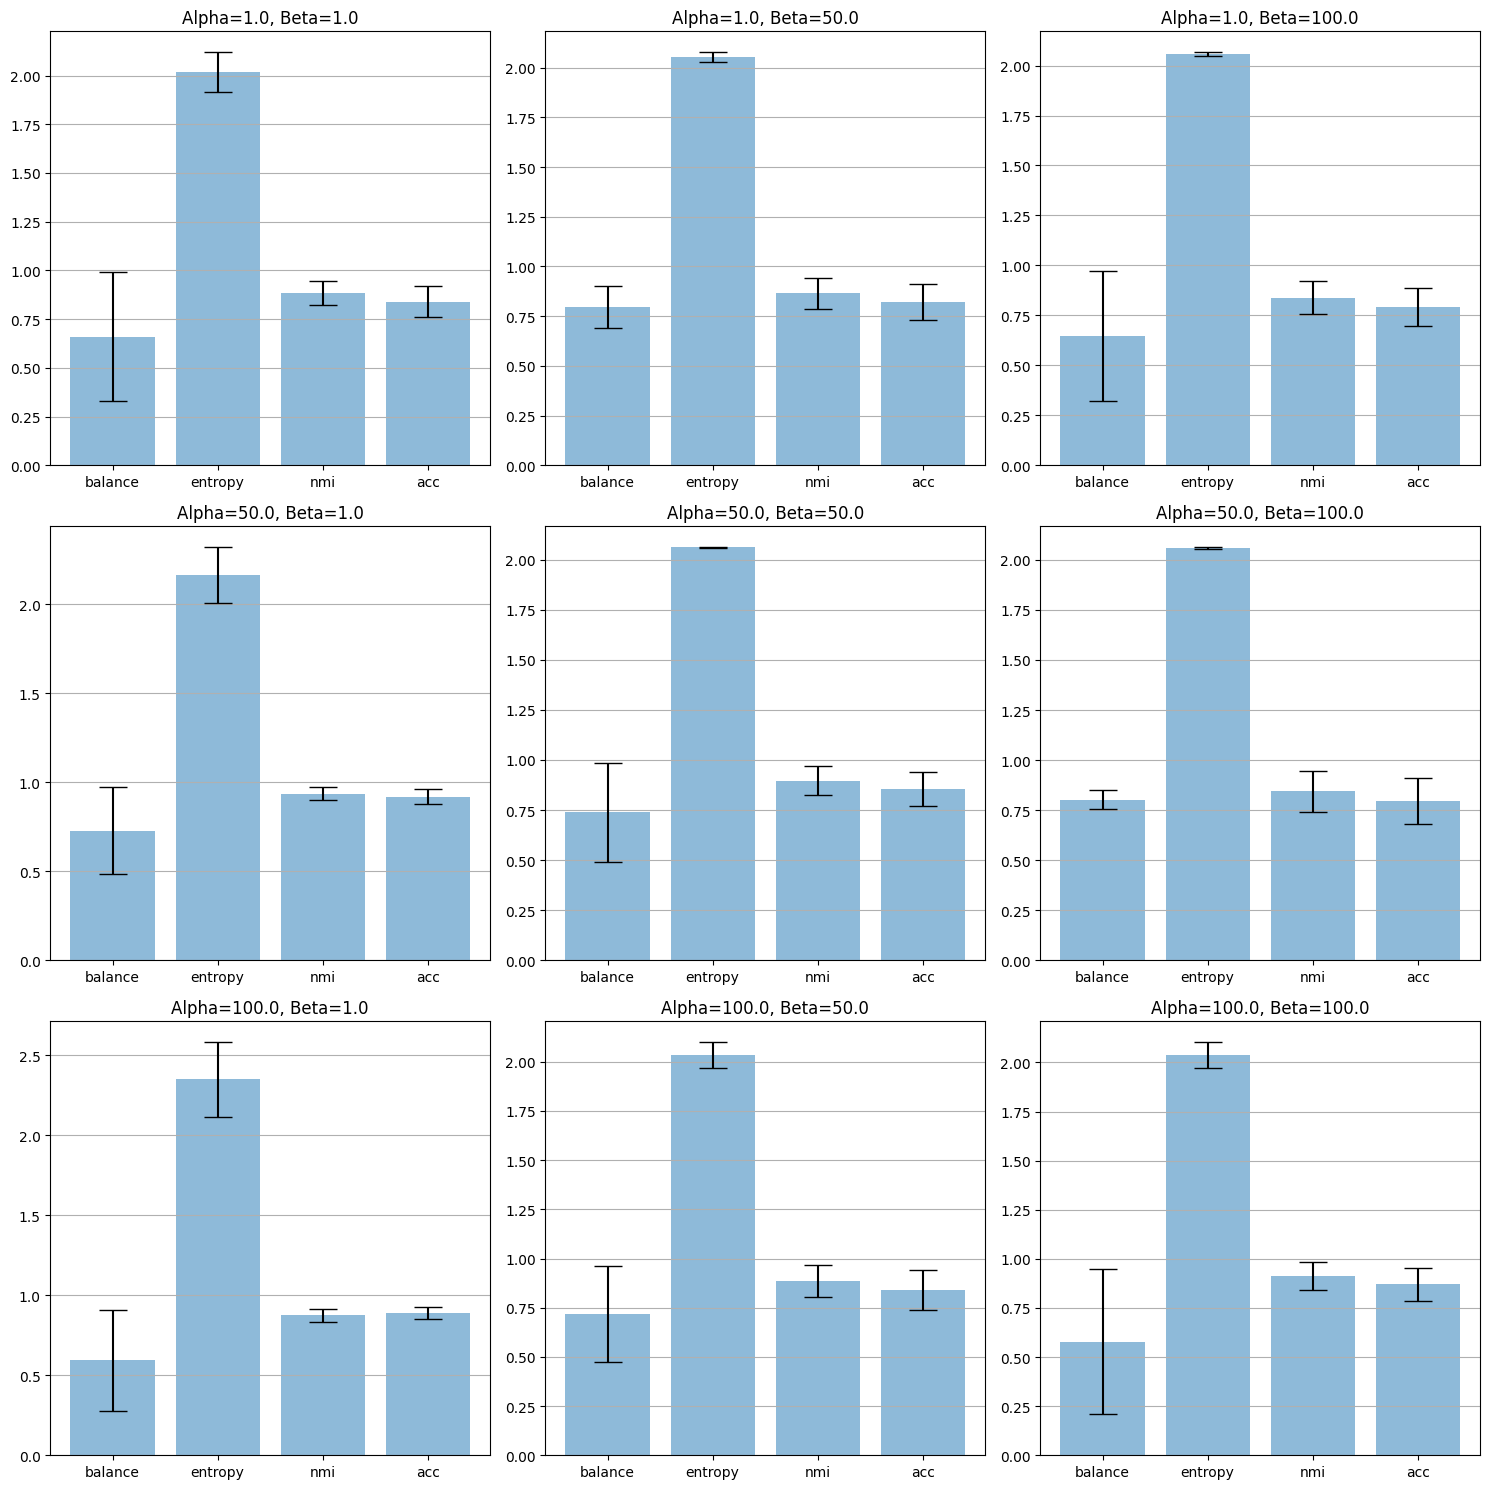

In [40]:
import matplotlib.pyplot as plt

metrics = ['balance', 'entropy', 'nmi', 'acc']
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

for i, (group, values) in enumerate(grouped.items()):
    row = i // 3
    col = i % 3
    ax = axs[row, col]
    
    balances, entropies, nmis, accs = zip(*values)
    means = [np.mean(balances), np.mean(entropies), np.mean(nmis), np.mean(accs)]
    stds = [np.std(balances), np.std(entropies), np.std(nmis), np.std(accs)]
    
    ax.bar(metrics, means, yerr=stds, align='center', alpha=0.5, ecolor='black', capsize=10)
    ax.set_title(f'Alpha={group[0]}, Beta={group[1]}')
    ax.yaxis.grid(True)

plt.tight_layout()
plt.savefig('ablation_bar.png')
plt.show()